# Iris Dataset Classification with Logistic Regression

I kinda needed to do this one, right?

In [28]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('../data/iris.data', header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.loc[df['class'] == 'Iris-setosa', 'class'] = 0
df.loc[df['class'] == 'Iris-versicolor', 'class'] = 1
df.loc[df['class'] == 'Iris-virginica', 'class'] = 2

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.groupby('class').size()

class
0    50
1    50
2    50
dtype: int64

<Axes: >

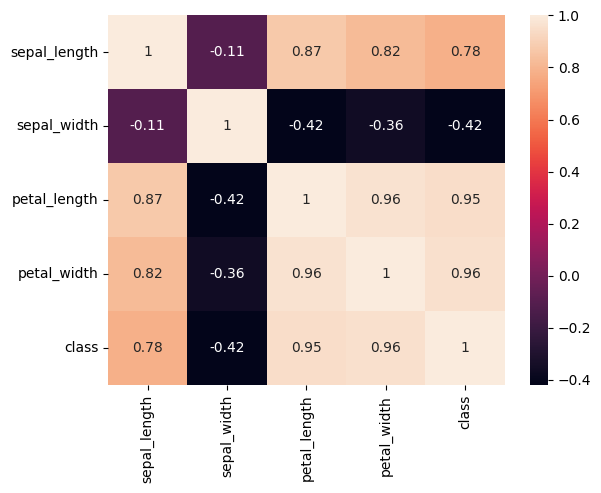

In [7]:
sns.heatmap(df.corr(), annot=True)

c:\Users\Rubén\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


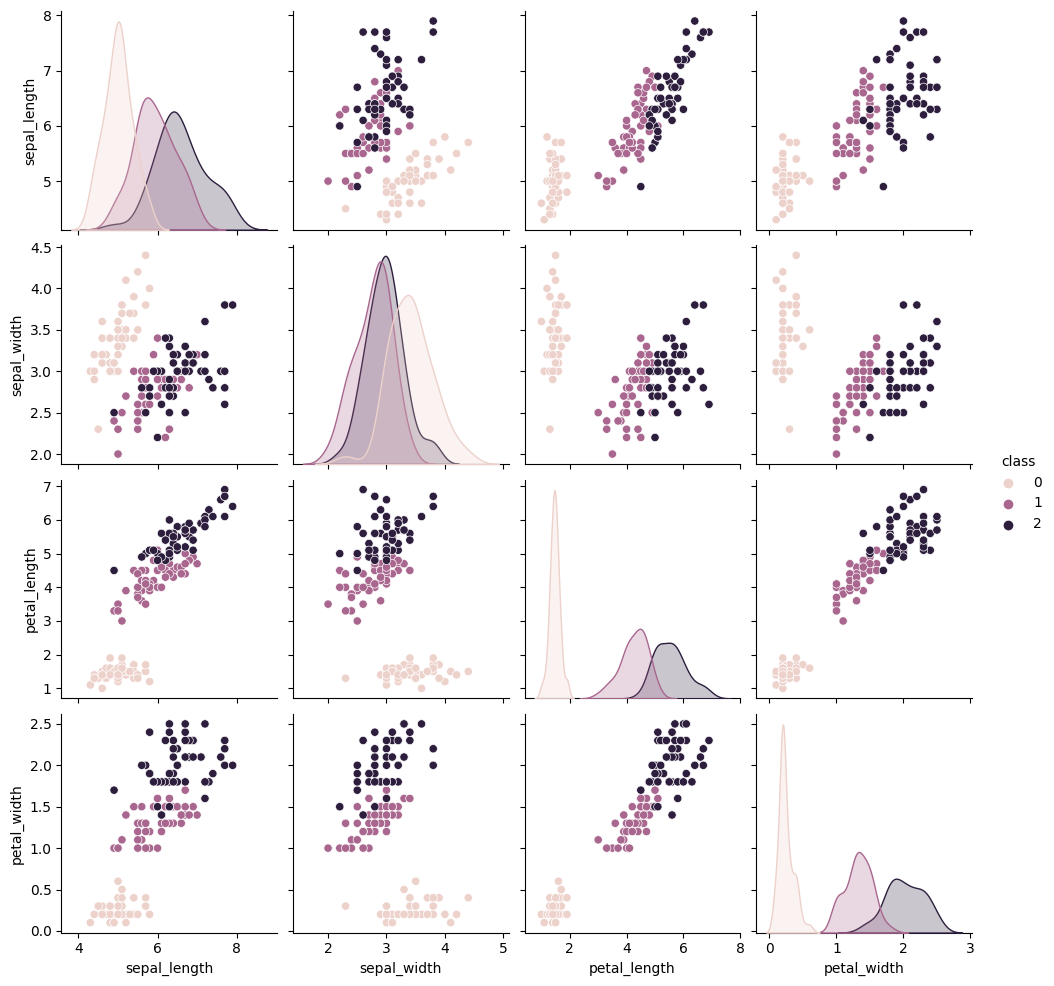

In [8]:
sns.pairplot(df, hue='class')

In [24]:
x = df[df.columns[0:-1]].values
y = df[df.columns[-1]].values

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [33]:
model = LogisticRegression()

model.fit(x_train, y_train)

y_hat = model.predict(x_test)


In [34]:
accuracy_score(y_test, y_hat)

0.9666666666666667

In [37]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



<Axes: >

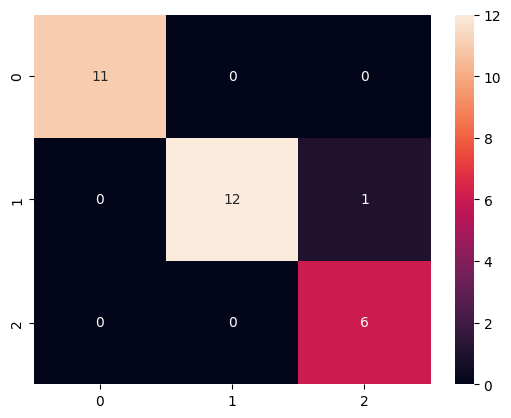

In [35]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='d')